<a href="https://colab.research.google.com/github/sajib-222/Digital-Image-Processing/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Shariful Islam sajib sarker
### ID: 2125051016

Task: Read a black and white image using URL and apply this custom weighted filter on that image (both manually and using cv2.filter2D) and show all 3 pictures in same plot as subplots.

### [ 1,1,1
### 1,2,1
### 1,1,1]

 Don't forget to normalize accordingly.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
url = 'https://www.photomaskportal.com/uploads/1/1/6/1/11617247/5226523_orig.jpg'
response = requests.get(url)
img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)

In [3]:
kernel = np.array([
    [1, 1, 1],
    [1, 2, 1],
    [1, 1, 1]
], dtype=np.float32)
kernel /= kernel.sum()

In [4]:
def manual_convolution(image, kernel):
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    padded = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REFLECT)
    result = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i + k_h, j:j + k_w]
            result[i, j] = np.sum(region * kernel)

    return np.clip(result, 0, 255).astype(np.uint8)

In [5]:
manual_filtered = manual_convolution(img, kernel)
opencv_filtered = cv2.filter2D(img, -1, kernel)

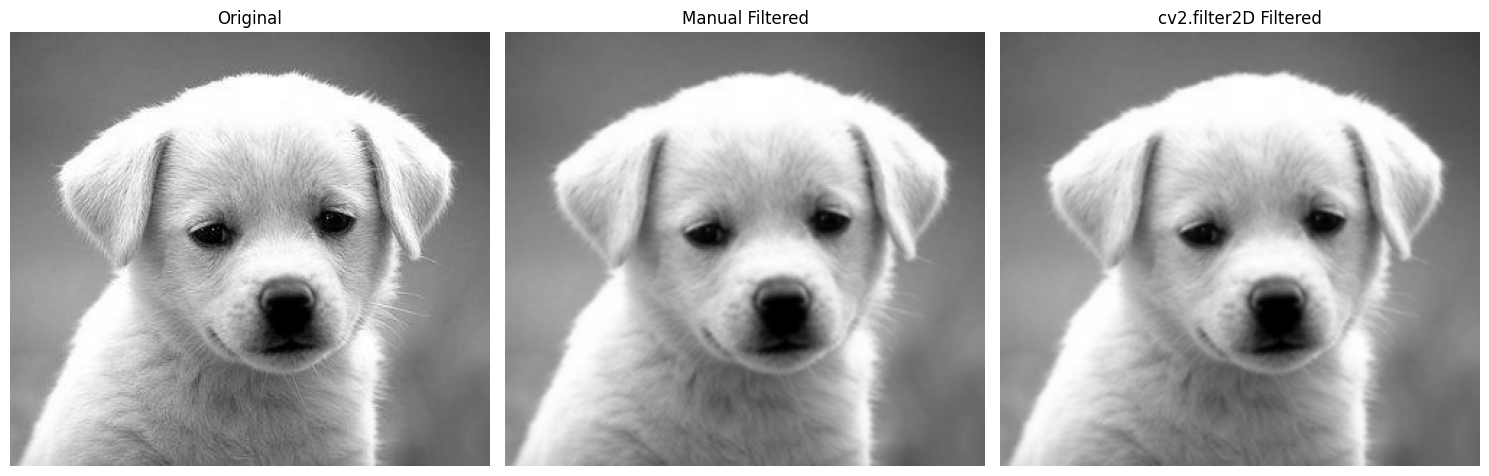

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(manual_filtered, cmap='gray')
plt.title('Manual Filtered')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opencv_filtered, cmap='gray')
plt.title('cv2.filter2D Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()